In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [139]:
path = "https://raw.githubusercontent.com/amankharwal/Website-data/master/heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [199]:
# Checking the null values in the Data 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [141]:
df.shape

(303, 14)

In [142]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


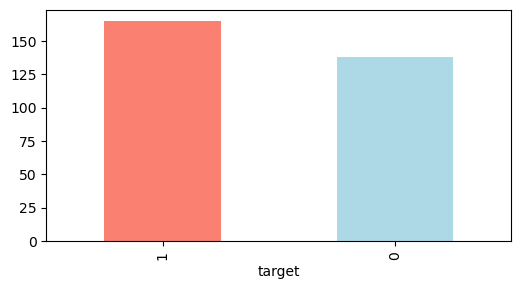

target
1    165
0    138
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [230]:
plt.figure(figsize=(6,3))
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()
plt.savefig("DataDistribution.png")
print(df.target.value_counts())

###### We have 164 people with heart disease and 138 are good. So our problem is Balanced 

In [144]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
sex : [1 0]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
cp : [3 2 1 0]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 26

In [145]:
print("Columns with categorical values are : ",categorical_val)
print("Columns with continous values are : ",continous_val)

Columns with categorical values are :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Columns with continous values are :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


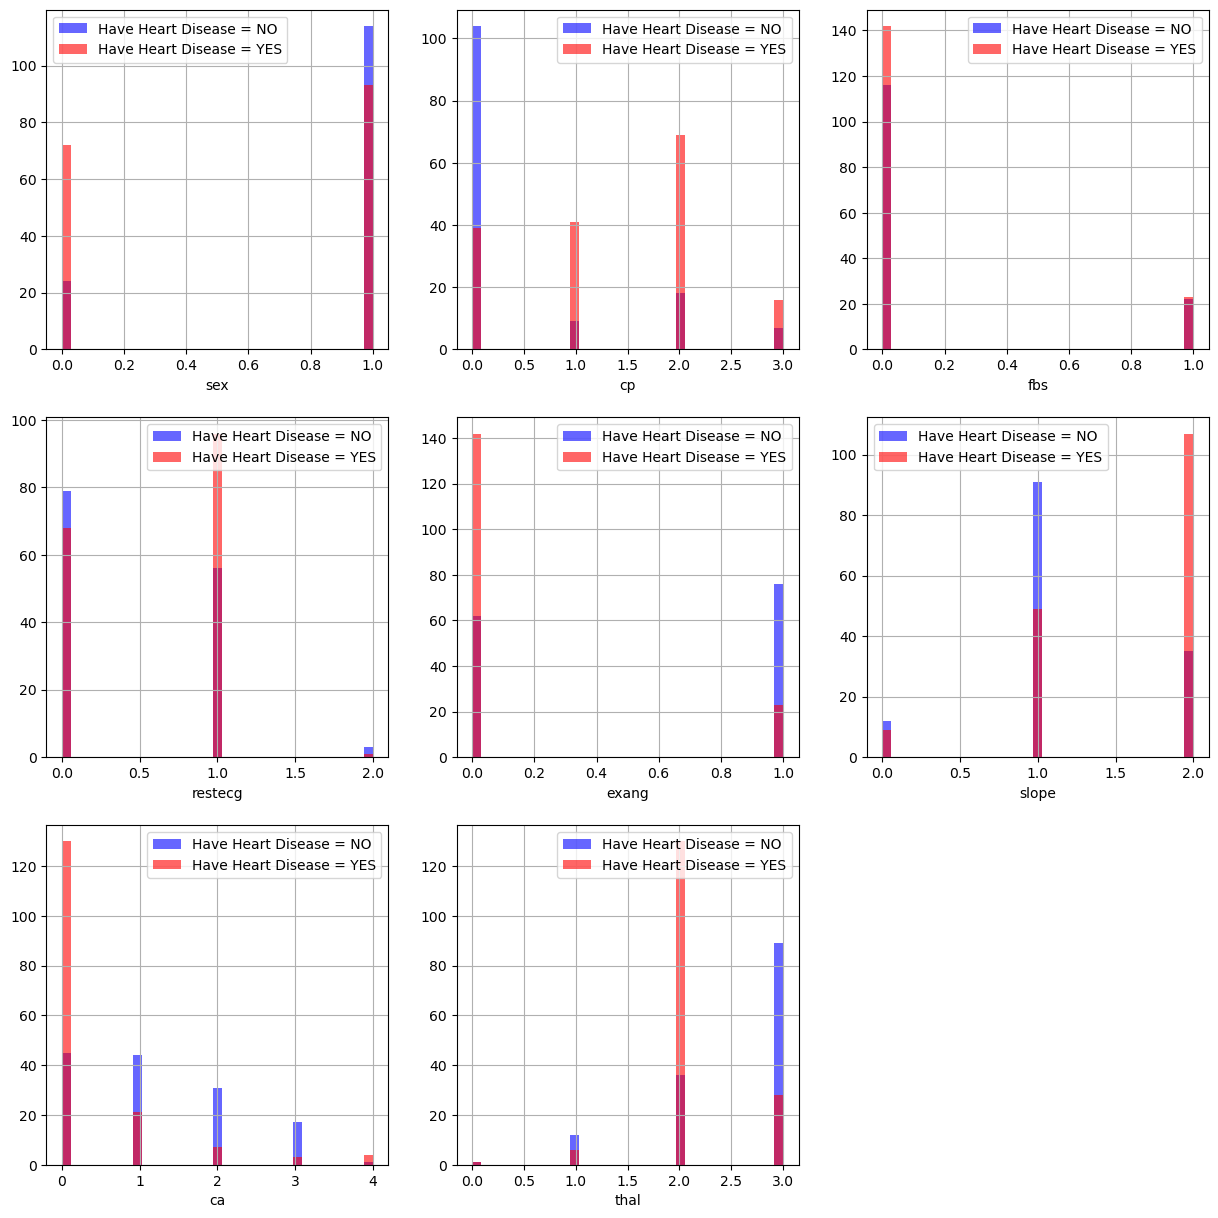

In [228]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.savefig("Chart2.png")
    plt.xlabel(column)

### Observations from the Plot:

1. **cp (Chest pain):**
   - People with `cp` values of 1, 2, or 3 are more likely to have heart disease compared to those with `cp = 0`.

2. **restecg (Resting EKG results):**
   - Individuals with a `restecg` value of 1 (indicating an abnormal heart rhythm, ranging from mild to severe issues) are more prone to heart disease.

3. **exang (Exercise-induced angina):**
   - People with `exang = 0` (No angina induced by exercise) show a higher likelihood of heart disease than those with `exang = 1` (Yes, angina induced by exercise).

4. **slope (The slope of the ST segment of peak exercise):**
   - A slope value of 2 (Downsloping: indicative of an unhealthy heart) is associated with a higher risk of heart disease.
   - In contrast, slope values of 0 (Upsloping: indicative of the best heart rate response during exercise) or 1 (Flat sloping: minimal change, typical in a healthy heart) show a lower risk.

5. **ca (Number of major vessels stained by fluoroscopy):**
   - Individuals with `ca = 0` (greater blood movement) are more likely to have heart disease.

6. **thal (Thalium stress test result):**
   - People with a `thal` value of 2 (Defect corrected: previously a defect but now functioning normally) are at a higher risk of heart disease.
 of heart disease.


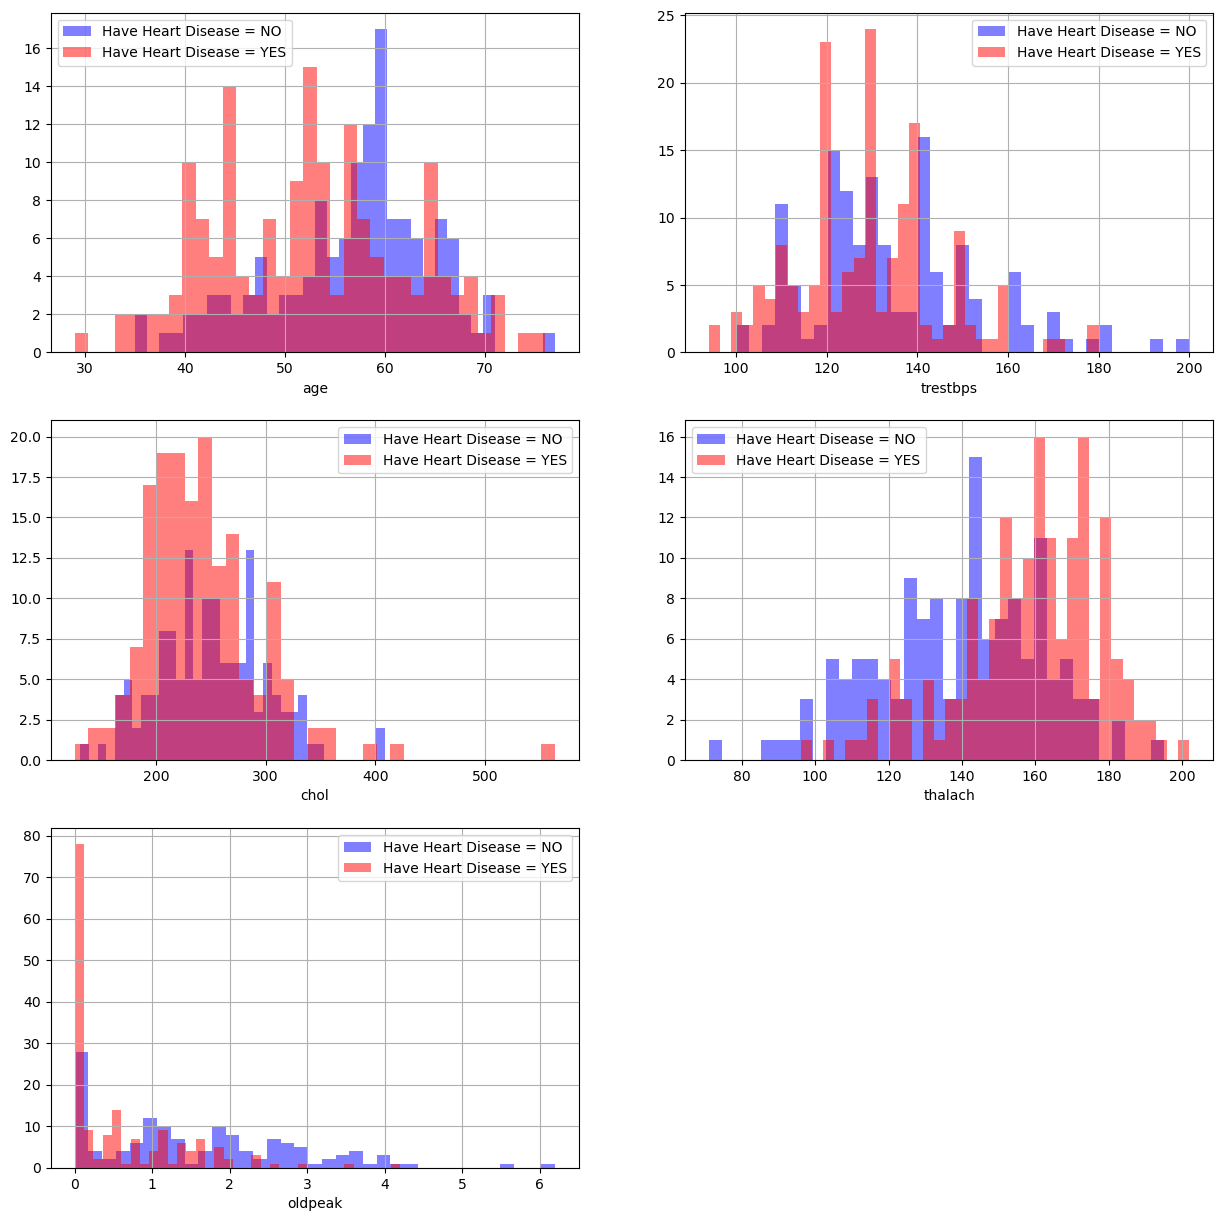

In [226]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.5)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.5)
    plt.legend()
    plt.savefig("Chart1.png")
    plt.xlabel(column)

### Observations from the Plot:

1. **trestbps (Resting Blood Pressure):**
 - Resting blood pressure (`trestbps`) values above 130-140 are generally considered a cause for concern.rn.

2. **chol (Cholesterol):**
   - Chole (`chol`)sterol levels greater than 200 are considered concerning.

3. **thalach (Maximum Heart Rate Achieved):**
   - People with a maximum heart rate of over 140 are more likely to have heart disease.

4. **oldpeak (ST Depression Induced by Exercise):**
   - The "oldpeak" measures exercise-induced ST depression versus rest. It reflects heart stress during exercise; an unhealthy heart will experience greater stress.
more.

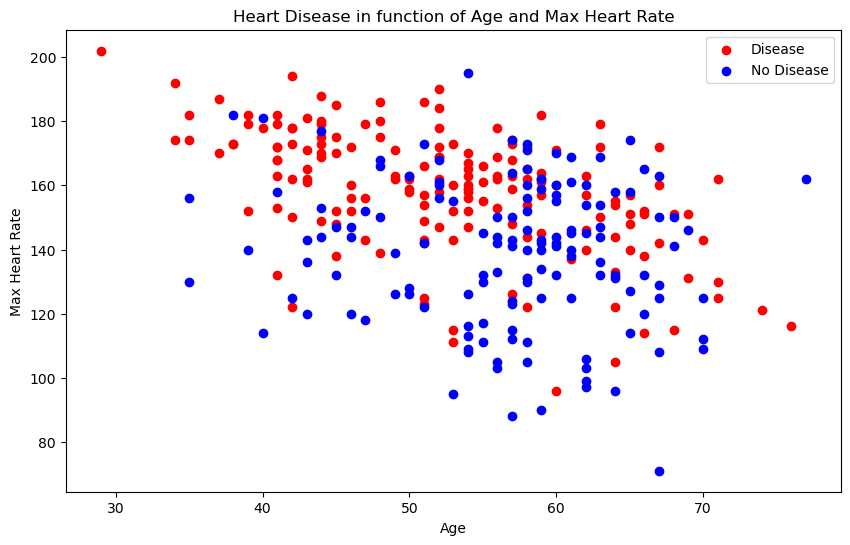

In [225]:
plt.figure(figsize=(10,6))

plt.scatter(
    df.age[df['target'] == 1],
    df.thalach[df['target'] == 1],
    c = 'red'
           )

plt.scatter(
    df.age[df['target'] == 0],
    df.thalach[df['target'] == 0],
    c = 'blue'
           )

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])
plt.savefig("Age-Heartrate.png")
plt.show()

## Correlation Matrix

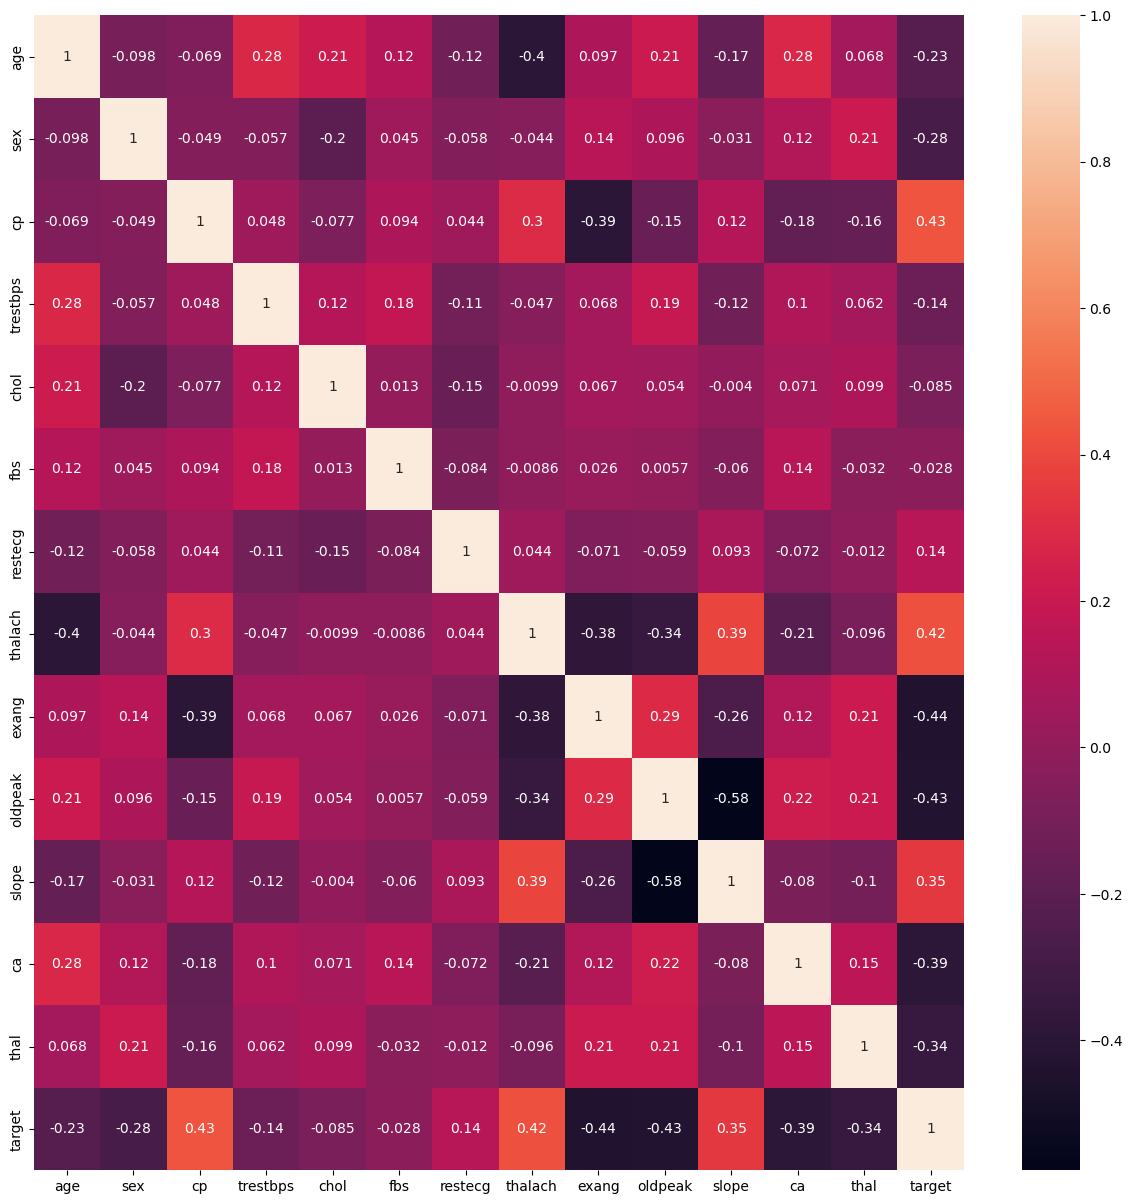

In [149]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.savefig('CorrelationMatrix.png')

### Correlation with Target

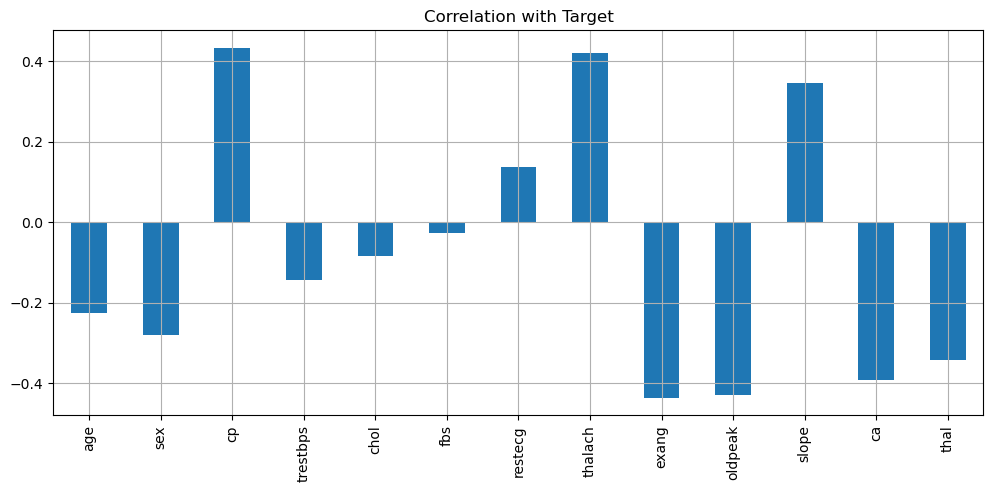

In [224]:
plt.figure(figsize=(12,5))
df.drop(['target'], axis=1).corrwith(df.target).plot(kind='bar', grid=True)
plt.title('Correlation with Target')
plt.savefig("CorrelationWithTarget.png")

### Observation from Correlation :
1. `fbs` and `chol` are the least correlated with the target variable.
2.  All other variables have a significant correlation with the target variable.
j

## Standardize the scale 

In [166]:
categorical_val.remove('target')
new_df = pd.get_dummies(df, columns = categorical_val)
scaler = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_df[col_to_scale] = scaler.fit_transform(new_df[col_to_scale])

## Data spliting & Training of Model

In [200]:
# Splitting the data 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [201]:
# Makeing object of LogisticRegression class
lr = LogisticRegression(solver='liblinear')

In [202]:
# Train the model 
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [203]:
# predict the values 
y_pred = lr.predict(x_test)

In [209]:
# Checking the prediction accuracy of  the model
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 100.00%


In [222]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[24  0]
 [ 0 37]]



---

## Key Observations

1. **True Positives (TP)**: 24
   - The model correctly predicted 24 positive instances.

2. **True Negatives (TN)**: 37
   - The model correctly predicted 37 negative instances.

3. **False Positives (FP)**: 0
   - The model did not incorrectly classify any negative instance as positive.

4. **False Negatives (FN)**: 0
   - The model did not incorrectly classify any positive instance as negative.

---

## Model Performance Metrics

1. **Accuracy**: 
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = 100\%.
   \]

2. **Precision**:
   \[
   \text{Precision} = \frac{TP}{TP + FP} = 100\%.
   \]

3. **Recall (Sensitivity)**:
   \[
   \text{Recall} = \frac{TP}{TP + FN} = 100\%.
   \]

4. **Specificity**:
   \[
   \text{Specificity} = \frac{TN}{TN + FP} = 100\%.
   \]

5. **F1-Score**:
   \[
   \text{F1-Score} = 100\%.
   \]

---

## Conclusion

- The model achieved **perfect performance** on this dataset.
- All predictions were accurate, with no false positives or false negatives.
- Such results indicate the model is well-suited for this problem, though additional testing on unseen data is recommended to confirm generalizability.
